# Visualization for Publication

Answering the following research questions:

* How is the increase of the density of the public fast-charging infrastructure network affecting the adoption of battery-eletric vehicles in different income classes?
* Is there a spill-over effect of local public charging infrastructure investments on the adoption of battery-electric passenger 

In [196]:
import matplotlib.pyplot as plt  
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd
import yaml

In [197]:
def process_key(key):
    # Convert string key to a tuple
    return safe_tuple_parser(key)

def process_value(value):
    # Convert string value to float
    return float(value)

def safe_tuple_parser(key):
    """
    Safely parses string representations of nested tuples into actual Python tuples.
    Example: "(2024, (1, 7, 0), (1, 8), 2024)" -> (2024, (1, 7, 0), (1, 8), 2024)
    """
    import ast  # Abstract Syntax Tree module for safe literal evaluation

    # Remove outer quotes if present and use `ast.literal_eval`
    try:
        return ast.literal_eval(key)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Failed to parse key: {key}") from e


In [ ]:
def read_data(case_study_name, input_file_name):
    current_path = os.getcwd()
    print("Current path:", current_path)
    file_results = os.path.normpath(current_path + "/results")
    print("File results:", os.path.normpath(file_results))
    file_path = os.path.join(current_path, "/results")
    print(file_path)
    # Normalize the path
    normalized_path = os.path.normpath(file_path)
    print("Normalized path:", normalized_path)

    # reading input data 
    folder_input = os.path.normpath(current_path + "/data")
    with open(folder_input + "/" + input_file_name) as file:
        input_data = yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_n_fueling_dict.yaml")) as file:
    #     n_fueling_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_dict.yaml")) as file:
        budget_penalty_minus_dict = yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")) as file:
        budget_penalty_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_yearly_dict.yaml")) as file:
        budget_penalty_plus_yearly_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_yearly_dict.yaml")) as file:
        budget_penalty_minus_yearly_dict= yaml.safe_load(file)

    # with open(os.path.normpath(file_results + "/" + case_study_name + "_detour_time_dict.yaml")) as file:
    #     detour_time_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_f_dict.yaml")) as file:
        f_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_dict.yaml")) as file:
        h_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_exist_dict.yaml")) as file:
        h_exist_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_minus_dict.yaml")) as file:
        h_minus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_h_plus_dict.yaml")) as file:
        h_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_dict.yaml")) as file:
        q_fuel_infr_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_q_mode_infr_plus_dict.yaml")) as file:
        q_mode_infr_plus_dict= yaml.safe_load(file)

    with open(os.path.normpath(file_results + "/" + case_study_name + "_s.yaml")) as file:
        s_dict= yaml.safe_load(file)
    
    budget_penalty_minus = {process_key(key): process_value(value) for key, value in budget_penalty_minus_dict.items()}
    budget_penalty_plus = {process_key(key): process_value(value) for key, value in budget_penalty_plus_dict.items()}
    #  detour_time = {process_key(key): process_value(value) for key, value in detour_time_dict.items()}
    f = {process_key(key): process_value(value) for key, value in f_dict.items()}
    h = {process_key(key): process_value(value) for key, value in h_dict.items()}
    h_exist = {process_key(key): process_value(value) for key, value in h_exist_dict.items()}
    h_minus = {process_key(key): process_value(value) for key, value in h_minus_dict.items()}
    h_plus = {process_key(key): process_value(value) for key, value in h_plus_dict.items()}
    q_fuel_infr_plus = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_dict.items()}
    q_mode_infr_plus = {process_key(key): process_value(value) for key, value in q_mode_infr_plus_dict.items()}
    s = {process_key(key): process_value(value) for key, value in s_dict.items()}
    # n_fueling = {process_key(key): process_value(value) for key, value in n_fueling_dict.items()}
    detour_time = {}
    n_fueling = {}
    output_data = {"budget_penalty_minus": budget_penalty_minus, "budget_penalty_plus": budget_penalty_plus, "detour_time": detour_time, "f": f, "h": h, "h_exist": h_exist, "h_minus": h_minus, "h_plus": h_plus, "q_fuel_infr_plus": q_fuel_infr_plus, "q_mode_infr_plus": q_mode_infr_plus, "s": s, "n_fueling": n_fueling}

    return input_data, output_data
    


## Plotting detour time 

In [ ]:
case_studies = ["cs_2025-03-04_13-53-14"]
input_file_name = "calibration_iteration_0.yaml"
case_study_output = {}
case_study_input = {}
for cs in case_studies:
    input_data, output_data = read_data(cs, input_file_name)
    case_study_output[cs] = output_data
    case_study_input[cs] = input_data


Current path: c:\Github\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Github\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results


In [200]:
detour_times_at_edge = {}
infrastructure_expansion = {}
fueled_energy = {}
fueled_other_energy = {}
stock_of_fueling_there = {}
load_factor = {}
mode_shift = {}
total_h_fs_allfuels = {}
total_h_fs = {}
total_h_fs_share = {}
modal_shift_split_fs = {}

model_parameters = input_data["Model"]
gamma = model_parameters["gamma"]
Y = model_parameters["Y"]
investment_period = model_parameters["investment_period"]
# investment_period = 1
y_init = model_parameters["y_init"]
pre_y = model_parameters["pre_y"]
product_list = input_data["Product"]
odpair_list = input_data["Odpair"]
path_list = input_data["Path"]
techvehicle_list = input_data["TechVehicle"]
fuel_list = input_data["Fuel"]
geometric_element_list = input_data["GeographicElement"]
technology_list = input_data["Technology"]
mode_list = input_data["Mode"]
financial_status = input_data["FinancialStatus"]


odpair_list_dict = {item["id"]: item for item in odpair_list}
techvehicle_list_dict = {item["id"]: item for item in techvehicle_list}
product_list_dict = {item["id"]: item for item in product_list}
path_list_dict = {item["id"]: item for item in path_list}
fuel_list_dict = {item["id"]: item for item in fuel_list}
geometric_element_list_dict = {item["id"]: item for item in geometric_element_list}
technology_list_dict = {item["id"]: item for item in technology_list}
mode_list_dict = {item["id"]: item for item in mode_list}
financial_status_dict = {item["id"]: item for item in financial_status}

G = pre_y + Y
g_init = y_init - pre_y
Y_end = y_init + Y - 1

geom_id = 12
fuel_id = 2
for cs in case_studies:
    detour_time = case_study_output[cs]["detour_time"]
    n_fueling = case_study_output[cs]["n_fueling"]
    q_fuel_infr_plus = case_study_output[cs]["q_fuel_infr_plus"]
    h = case_study_output[cs]["h"]
    s = case_study_output[cs]["s"]
    f = case_study_output[cs]["f"]
    for y in range(y_init, Y_end + 1):
        detour_times_sum = sum([detour_time[(y, (p, r, odpair_list[r]["path_id"], geom_id), fuel_id)] for r in odpair_list_dict.keys() for p in product_list_dict.keys() if (y, (p, r, odpair_list[r]["path_id"], geom_id), fuel_id) in detour_time.keys()])    
        n_fueling_sum = sum([n_fueling[(y, (p, r, odpair_list[r]["path_id"], geom_id), fuel_id)] for r in odpair_list_dict.keys() for p in product_list_dict.keys() if (y, (p, r, odpair_list[r]["path_id"], geom_id), fuel_id) in n_fueling.keys()])    
        if n_fueling_sum > 0:
            detour_times_at_edge[(y, fuel_id)] = detour_times_sum/n_fueling_sum
        else:
            detour_times_at_edge[(y, fuel_id)] = 0
        
        q_fuel_infr_plus_sum = sum(q_fuel_infr_plus[(y0, fuel_id, geom_id)] for y0 in np.arange(y_init, y+1, investment_period) if (y0, fuel_id, geom_id) in q_fuel_infr_plus.keys())
        infrastructure_expansion[y] = q_fuel_infr_plus_sum

        total_s_sum = sum([s[(y, (1, r, odpair_list[r]["path_id"], geom_id), tv)] for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() if (y, (1, r, odpair_list[r]["path_id"], geom_id), tv) in s.keys() and technology_list_dict[techvehicle_list_dict[tv]["technology"]]["fuel"] == fuel_list_dict[fuel_id]["name"]])
        fueled_energy[y] = total_s_sum
        total_s_sum_other = sum([s[(y, (1, r, odpair_list[r]["path_id"], geom_id), tv)] for r in odpair_list_dict.keys() for tv in techvehicle_list_dict.keys() if (y, (1, r, odpair_list[r]["path_id"], geom_id), tv) in s.keys() and technology_list_dict[techvehicle_list_dict[tv]["technology"]]["fuel"] != fuel_list_dict[fuel_id]["name"]])
        fueled_other_energy[y] = total_s_sum_other

        total_h = sum([h[(y, r, tv_id, g)] for r in odpair_list_dict.keys() for tv_id in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, r, tv_id, g) in h.keys() and geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"] and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel_list_dict[fuel_id]["name"]])
        stock_of_fueling_there[y] = total_h
        if q_fuel_infr_plus_sum > 0:
            load_factor[y] = total_s_sum/(q_fuel_infr_plus_sum * 365 * 24) * 100
        else:
            load_factor[y] = 0

        for m in mode_list_dict.keys():
            f_pkm = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (m, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(1, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys())
            mode_shift[(y, m)] = f_pkm
        
        if y == Y_end:
            for fs in financial_status_dict.keys():
                fs_name = financial_status_dict[fs]["name"]
                f_pkm_total = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (m, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(1, 17) for g in range(g_init, y + 1) for m in mode_list_dict.keys() if (y, (p, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])
                f_pkm = sum(f[(y, (p, r, odpair_list_dict[r]["path_id"]), (1, tv), g)] * path_list_dict[odpair_list_dict[r]["path_id"]]["length"] for p in product_list_dict.keys() for r in odpair_list_dict.keys() for tv in range(1, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and fs_name == odpair_list_dict[r]["financial_status"])

                if f_pkm_total > 0:
                    modal_shift_split_fs[(y, fs)] = (f_pkm/f_pkm_total) * 100
                else:
                    modal_shift_split_fs[(y, fs)] = 0

        for fs in financial_status_dict.keys():
            fs_name = financial_status_dict[fs]["name"]
            sum_h_fs = sum([h[(y, r, tv_id, g)] for r in odpair_list_dict.keys() for tv_id in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, r, tv_id, g) in h.keys() and geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"] and technology_list_dict[techvehicle_list_dict[tv_id]["technology"]]["fuel"] == fuel_list_dict[fuel_id]["name"] and fs_name == odpair_list_dict[r]["financial_status"]])
            sum_h_fs_allfuels = sum([h[(y, r, tv_id, g)] for r in odpair_list_dict.keys() for tv_id in techvehicle_list_dict.keys() for g in range(g_init, y + 1) if (y, r, tv_id, g) in h.keys() and geom_id in path_list_dict[odpair_list_dict[r]["path_id"]]["sequence"] and fs_name == odpair_list_dict[r]["financial_status"]])
            total_h_fs[(y, fs)] = sum_h_fs
            total_h_fs_allfuels[(y, fs)] = sum_h_fs_allfuels
            if y == Y_end:
                if sum_h_fs_allfuels > 0:
                    total_h_fs_share[(y, fs)] = sum_h_fs/sum_h_fs_allfuels * 100
                else:
                    total_h_fs_share[(y, fs)] = 0

print(detour_times_at_edge)
print(infrastructure_expansion)
print(fueled_energy)
print(fueled_other_energy)
print(stock_of_fueling_there)
print(mode_shift)
print(load_factor)
print(total_h_fs)
print(total_h_fs_allfuels)
print(total_h_fs_share)
print(modal_shift_split_fs)

{(2020, 2): 0, (2021, 2): 0, (2022, 2): 0, (2023, 2): 0, (2024, 2): 0, (2025, 2): 0, (2026, 2): 0, (2027, 2): 0, (2028, 2): 0, (2029, 2): 0, (2030, 2): 0, (2031, 2): 0, (2032, 2): 0, (2033, 2): 0, (2034, 2): 0, (2035, 2): 0, (2036, 2): 0, (2037, 2): 0, (2038, 2): 0, (2039, 2): 0}
{2020: 11414.959863, 2021: 36059.95601, 2022: 68763.578102, 2023: 109555.83656, 2024: 149167.217609, 2025: 189700.556426, 2026: 217342.202012, 2027: 245693.624529, 2028: 269455.140688, 2029: 311989.961176, 2030: 311989.961176, 2031: 311989.961176, 2032: 311989.961176, 2033: 311989.961176, 2034: 311989.961176, 2035: 311989.961176, 2036: 311989.961176, 2037: 311989.961176, 2038: 311989.961176, 2039: 311989.961176}
{2020: 38049866.211188, 2021: 120199853.368347, 2022: 229211927.008695, 2023: 365186121.868394, 2024: 497224058.697136, 2025: 632335188.086031, 2026: 724474006.707695, 2027: 818978748.429397, 2028: 898183802.293751, 2029: 1039966537.252582, 2030: 1023268240.062299, 2031: 960506619.395022, 2032: 9357426

## Plots

```python

```



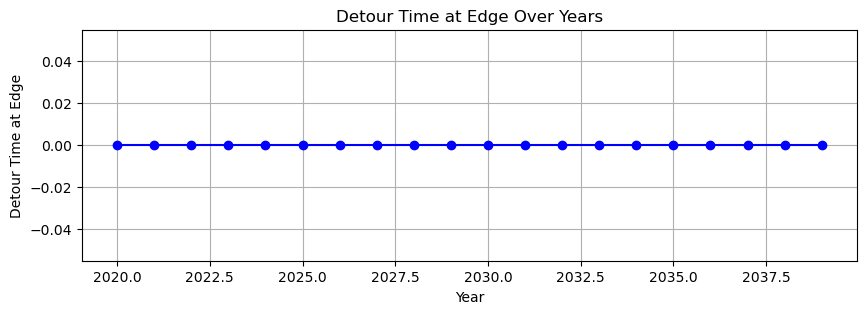

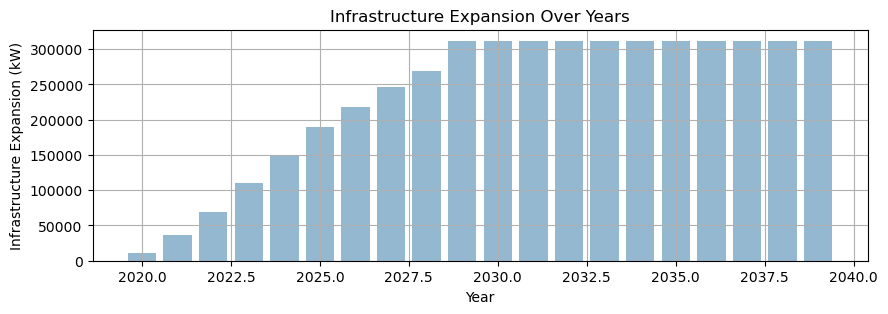

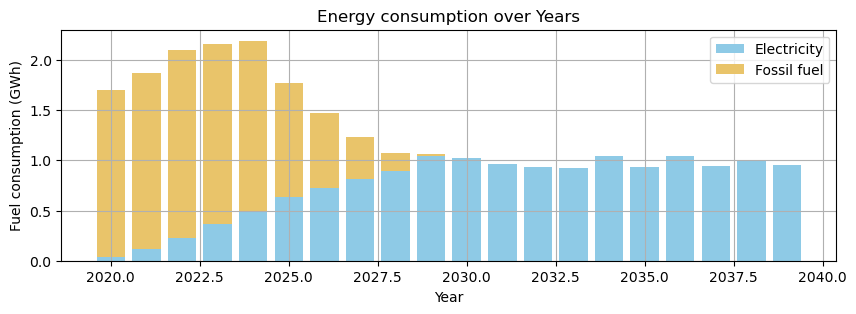

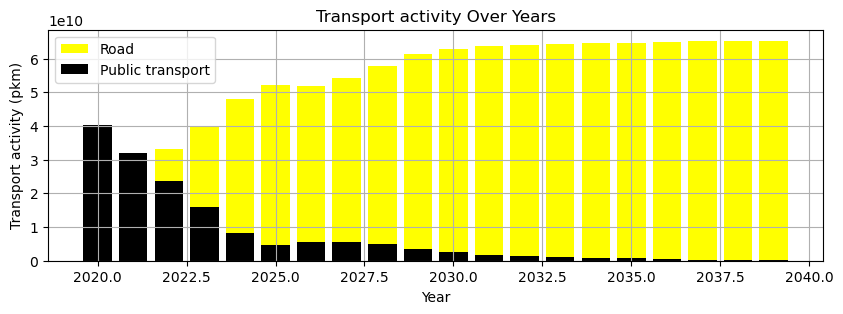

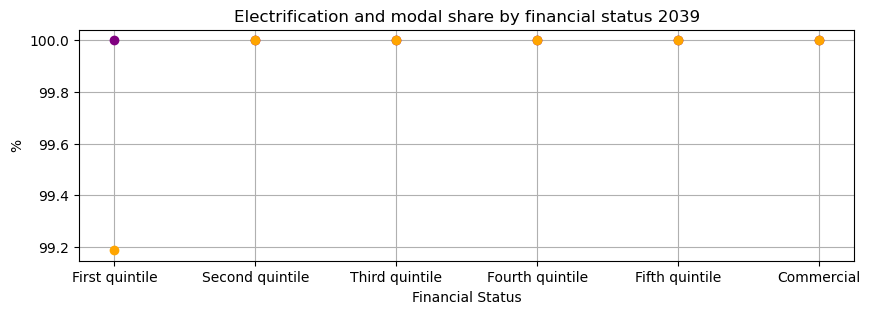

In [201]:
current_path = os.getcwd()

file_results = os.path.normpath(current_path + "/results")
case_study_name = case_studies[0]
years = [item[0] for item in list(detour_times_at_edge.keys())]
detour_times = list(detour_times_at_edge.values())

plt.figure(figsize=(10, 3))
plt.plot(years, detour_times, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Detour Time at Edge')
plt.title('Detour Time at Edge Over Years')
plt.grid(True)
plt.show()

infrastructure_expansion_values = list(infrastructure_expansion.values())

plt.figure(figsize=(10, 3))
plt.bar(years, infrastructure_expansion_values, color='#669bbc', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Infrastructure Expansion (kW)')
plt.title('Infrastructure Expansion Over Years')
plt.grid(True)
plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "infr_inv.png"), transparent=True)
plt.show()

fueled_energy_values = [item * 10 ** (-9) for item in list(fueled_energy.values())]
fueled_other_energy_values = [item * 10 ** (-9) for item in list(fueled_other_energy.values())]

plt.figure(figsize=(10, 3))
plt.bar(years, fueled_energy_values, color='#8ecae6', label='Electricity')
plt.bar(years, fueled_other_energy_values, bottom=fueled_energy_values, color='#e9c46a', label='Fossil fuel')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Fuel consumption (GWh)')
plt.title('Energy consumption over Years')
plt.grid(True)
plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "energ_cons.png"), transparent=True)
plt.show()

mode_1_values = [mode_shift[key] for key in list(mode_shift.keys()) if key[1] == 1]
mode_2_values = [mode_shift[key] for key in list(mode_shift.keys()) if key[1] == 2]

plt.figure(figsize=(10, 3))
plt.bar(years, mode_1_values, color='yellow', label='Road')
plt.bar(years, mode_2_values, bottom=fueled_energy_values, color='black', label='Public transport')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Transport activity (pkm)')
plt.title('Transport activity Over Years')
plt.grid(True)
plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "Transport_activity.png"), transparent=True)
plt.show()

financial_statuses = [financial_status_dict[fs]["name"] for fs in financial_status_dict.keys()]
total_h_fs_share_values = [total_h_fs_share[(Y_end, fs)] for fs in financial_status_dict.keys()]
modal_shift_split_fs_values = [modal_shift_split_fs[(Y_end, fs)] for fs in financial_status_dict.keys()]
plt.figure(figsize=(10, 3))
plt.grid(True, zorder=0)
plt.scatter(financial_statuses, total_h_fs_share_values, color='purple', zorder=3, label='Battery-electric vehicles (%)')
plt.scatter(financial_statuses, modal_shift_split_fs_values, color='orange', zorder=3, label='Modal Share Road (%)')
plt.xlabel('Financial Status')
plt.ylabel('%')
plt.title('Electrification and modal share by financial status ' + str(Y_end))
plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "elect_mode.png"), transparent=True)

plt.show()

